In [49]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import copy

In [50]:
# Objective function

def cost(x):
    return sum(x**2)

In [51]:
# Parent Selection

def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    
    return ind[0][0]

In [52]:
# Uniform Crossover

def crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)

    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']

    return c1, c2


In [53]:
# Mutation

def mutate(c, mu, sigma):
    # mu: mutation rate, sigma: step size
    y = copy.deepcopy(c)
    flag = np.random.rand(*(c['position'].shape)) <= mu  # array of True and Flase, indicating at which position to perform mutation
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)

    return y

In [54]:
#Crossover

def crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position'] 
    return c1, c2

In [55]:
# Mutation

def mutate(c, mu, sigma):
    # mu>>mutation rate, sigma>>step size of mutation 
    y = copy.deepcopy(c)   
    flag = np.random.rand(*(c['position'].shape)) <= mu #>>  mutation position
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y

In [56]:
# Apply Bounds

def bounds(c, varmin, varmax):
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)

In [57]:
# Bubble sorting >> best fit individuals at top

def sort(arr):
    n = len(arr) 
  
    for i in range(n-1): 
  
        for j in range(0, n-i-1):  
            if arr[j]['cost'] > arr[j+1]['cost'] : 
                arr[j], arr[j+1] = arr[j+1], arr[j]
        return arr

In [58]:
# Algorithm

def GA(costfunc, num_var, varmin, varmax, maxit, npop, nc, mu, sigma, beta):

    # Placeholder for each individual
    population = {}
    for i in range(npop):                                      
        population[i] = {'position': None, 'cost': None}        

        
    # Best solution found
    bestsol = copy.deepcopy(population)
    bestsol_cost = np.inf

    
    # Initialization
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)  
        population[i]['cost'] = costfunc(population[i]['position'])

        if population[i]['cost'] < bestsol_cost:                     
            bestsol = copy.deepcopy(population[i])                                

            
    # Best cost of each iteration(generation)
    bestcost = np.empty(maxit)

    # Main loop
    for it in range(maxit):

        # Calculating probability for roulette wheel selection
        costs = []
        for i in range(len(population)):
            costs.append(population[i]['cost'])                          
        costs = np.array(costs)
        avg_cost = np.mean(costs)                                       
        if avg_cost != 0:
            costs = costs/avg_cost
        probs = np.exp(-beta*costs)                         

        for _ in range(nc//2):             # 2 off springs for each crossover >> nc//2
 
          # Roulette wheel selection
            p1 = population[roulette_wheel_selection(probs)]
            p2 = population[roulette_wheel_selection(probs)]

          # crossover two parents
            c1, c2 = crossover(p1, p2)

          # Perform mutation
            c1 = mutate(c1, mu, sigma)
            c2 = mutate(c2, mu, sigma)

          # Apply bounds
            bounds(c1, varmin, varmax)
            bounds(c2, varmin, varmax)

          # Evaluate first off spring
            c1['cost'] = costfunc(c1['position'])                                    

            if type(bestsol_cost) == float:
                if c1['cost'] < bestsol_cost:                       
                    bestsol_cost = copy.deepcopy(c1)
            else:
                if c1['cost'] < bestsol_cost['cost']:          
                    bestsol_cost = copy.deepcopy(c1)


            # Evaluate second off spring
            if c2['cost'] < bestsol_cost['cost']:                      
                bestsol_cost = copy.deepcopy(c2)

                
        # Merge, Sort and Select
        population[len(population)] = c1
        population[len(population)] = c2

        population = sort(population)

        
        # Store best cost
        bestcost[it] = bestsol_cost['cost']

        # Show generation information
        print('Iteration {}: Best Cost = {}'. format(it, bestcost[it]))


    out = population
    Bestsol = bestsol
    bestcost = bestcost
    return (out, Bestsol, bestcost)

In [59]:
# Problem vars

costfunc = cost
num_var = 5       # number of decicion variables
varmin = -10      # lower bound
varmax = 10       # upper bound

In [60]:
# Algorithm Parameters

maxit = 500                                              # number of iterations
npop = 20                                                # initial population size
beta = 1
prop_children = 1                                        # proportion of children to population
nc = int(np.round(prop_children * npop/2)*2)             # making sure it always an even number
mu = 0.2                                                 # mutation rate 20%
sigma = 0.1                                              # step size of mutation

In [61]:
out = GA(costfunc, num_var, varmin, varmax, maxit, npop, nc, mu, sigma, beta)

Iteration 0: Best Cost = 18.10287091385318
Iteration 1: Best Cost = 18.10287091385318
Iteration 2: Best Cost = 7.097285888737398
Iteration 3: Best Cost = 7.097285888737398
Iteration 4: Best Cost = 5.054911133202542
Iteration 5: Best Cost = 3.6127755476549566
Iteration 6: Best Cost = 3.6127755476549566
Iteration 7: Best Cost = 3.6127755476549566
Iteration 8: Best Cost = 1.8772566797438928
Iteration 9: Best Cost = 1.8772566797438928
Iteration 10: Best Cost = 1.8772566797438928
Iteration 11: Best Cost = 1.8772566797438928
Iteration 12: Best Cost = 1.8772566797438928
Iteration 13: Best Cost = 1.8772566797438928
Iteration 14: Best Cost = 1.8772566797438928
Iteration 15: Best Cost = 1.8772566797438928
Iteration 16: Best Cost = 1.8772566797438928
Iteration 17: Best Cost = 1.8772566797438928
Iteration 18: Best Cost = 1.8772566797438928
Iteration 19: Best Cost = 1.7134891028509882
Iteration 20: Best Cost = 0.7686982697672655
Iteration 21: Best Cost = 0.7686982697672655
Iteration 22: Best Cost =

<function matplotlib.pyplot.show(close=None, block=None)>

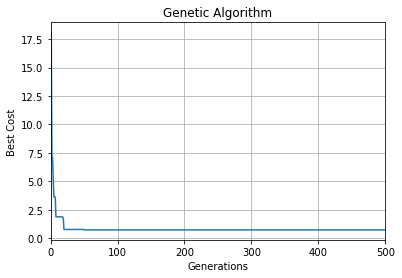

In [64]:
# Plot Results

#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show